# Modelo Epidemiológico SEIR

##  Introducción

## Modelos

### SEIR (Vital Dynamics, IDM)

Las ecuaciones del Modelo SEIR son (tomadas del [IDM](https://www.idmod.org/docs/hiv/model-seir.html)):

\begin{equation} \label{eq1}
\begin{split}
\frac{dS}{dt} & = \mu N -\nu S-\frac{\beta SI}{N} \\ \\
\frac{dE}{dt}& = \frac{\beta SI}{N} -(\nu +\sigma) E \\ \\
\frac{dI}{dt}& = \sigma E- (\gamma+\nu) I \\ \\
\frac{dR}{dt}& =  \gamma I -\nu R
\end{split}
\end{equation}

donde $N=S+E+I+R$ es la población total.

Parámetros:

$\beta(t)=$Tasa de Transmisión

$\sigma(t)=$Tasa de Incubación

$\gamma(t)=$Tasa de Recuperación

$\mu(t)=$Tasa de Natalidad 

$\nu(t)=$Tasa de Mortalidad

### SEIR (Vital Dynamics, Hans Nesse)

Las ecuaciones del Modelo SEIR son (tomadas de [aquí](http://www.public.asu.edu/~hnesse/classes/seir.html)):



\begin{equation} \label{eq1}
\begin{split}
\frac{dS}{dt} & = \mu (N-S) -\frac{\beta SI}{N}-\nu S \\ \\
\frac{dE}{dt}& = \frac{\beta SI}{N} -(\mu +\sigma) E \\ \\
\frac{dI}{dt}& = \sigma E- (\mu+\gamma) I \\ \\
\frac{dR}{dt}& =  \gamma I -\mu R + \nu S
\end{split}
\end{equation}

donde $N=S+E+I+R$ es la población total.

Parámetros:

$\beta(t)=$Tasa de Transmisión

$\sigma(t)=$Tasa de Incubación

$\gamma(t)=$Tasa de Recuperación

$\mu(t)=$Tasa de Mortalidad Natural (No depende de la enfermedad)

$\nu(t)=$Tasa de Mortalidad con Vacuna

## Implementación 

In [1]:
# Librerias Necesarias

from SEIR_Solver_Point import SEIR,np
import matplotlib.pyplot as plt
import time
# Intervalo de Tiempo
T=[0,15]

# Par. Numérico para Dimensión Temporal
# Esto debe cambiar a ser adptativo
n=100

# Parámetros Experimentales Funcionales Iniciales (Priori)

# β(t)=Tasa de Transmision
# σ(t)=Tasa de Incubación
# γ(t)=Tasa de Recuperación
# μ(t)=Tasa de Natalidad (Mortalidad Hans)
# ν(t)=Tasa de Mortalidad (Vacuna Hans)

# Ejemplo tomado de Hans
β=0.9*np.ones(n)
γ=0.2*np.ones(n)
σ=0.5*np.ones(n)
μ=0*np.ones(n)
ν=0*np.ones(n)
#-----------------------------------Solución Numérica de SEIR --------------------------------------

# for iteraciones in range(epochs):

# Solucionar Modelo con Parámetros Fijos
# Benchmark
t = time.time()
Sol=SEIR(T,β,σ,γ,μ,ν,n)
#print(Sol.round())

#--------------------------------------Red Neuronal va aquí---------------------------------------
# Actualizar Parámetros con Datos Reales
# Magia De Oscar

#-------------------------------------Pruebas de Normalidad---------------------------------------
# Magia de Sebas

# Ganamos o Cambiamos Cositas

# End Benchmark
elapsed = time.time() - t
print("tiempo:",elapsed)

Población Total: 11
tiempo: 0.026320219039916992


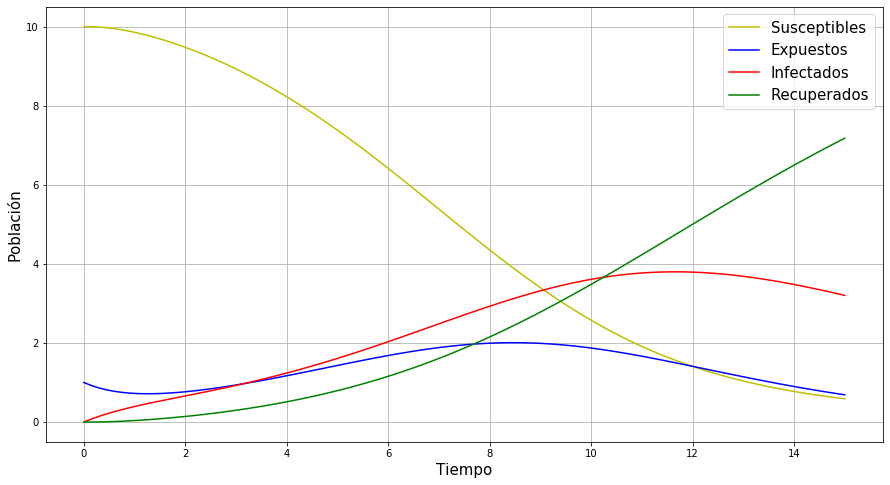

In [2]:
#--------------------Dibujitos y Animaciones-------------------

plt.figure(figsize=(15,8))
plt.plot(Sol[:,0],Sol[:,1],'y')
plt.plot(Sol[:,0],Sol[:,2],'b')
plt.plot(Sol[:,0],Sol[:,3],'r')
plt.plot(Sol[:,0],Sol[:,4],'g')
plt.legend(['Susceptibles','Expuestos','Infectados','Recuperados'],fontsize=15)
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Población',fontsize=15)
plt.grid()
plt.show()

## Estimación de Parámetros